# Import Library

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import hdbscan


# Load Dataset

In [14]:
digits = load_digits()
X = digits.data
y = digits.target
print(f" - Total samples: {X.shape[0]}")
print(f" - Total features: {X.shape[1]}")
print(" - Example first 5 samples (flattened pixels):")
print(X[:5])
print()

 - Total samples: 1797
 - Total features: 64
 - Example first 5 samples (flattened pixels):
[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 1

# Reduksi dimensi ke 2D dengan PCA

In [15]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)


# Clustering dengan HDBSCAN

In [16]:
hdb = hdbscan.HDBSCAN(min_cluster_size=15, min_samples=5)
hdb.fit(X_pca)

c:\Users\dedyb\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\dedyb\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


HDBSCAN(min_cluster_size=15, min_samples=5)

# Ambil label, hitung cluster & noise

In [17]:
labels = hdb.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)

# Visualisasi

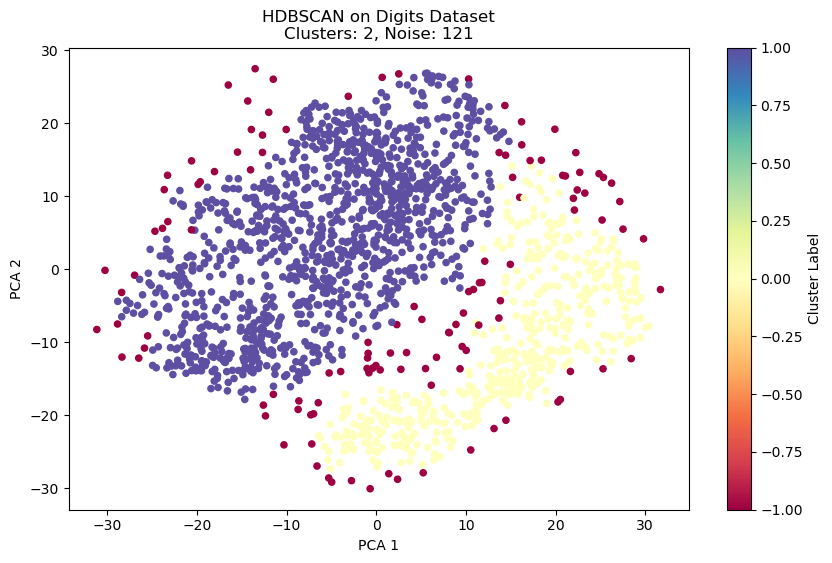

Jumlah cluster yang terbentuk : 2
Jumlah data yang dianggap noise: 121


In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Spectral', s=20)
plt.title(f'HDBSCAN on Digits Dataset\nClusters: {n_clusters}, Noise: {n_noise}')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster Label")
plt.show()

print("Jumlah cluster yang terbentuk :", n_clusters)
print("Jumlah data yang dianggap noise:", n_noise)

# Analisa

- Hanya terbentuk 2 cluster utama, padahal dataset berisi 10 kelas angka, yang artinya algoritma DBSCAN tidak berhasil memisahkan semua digit dengan baik / hanya menemukan 2 kelompok besar yang dianggap memiliki kepadatan berbeda.

- Terdapat 121 noise (3-4% dari total 1797 sampel), yang menandakan ada sebagian kecil data yang tidak cukup mirip dengan satu cluster utama (dianggap outlier).